# <center>Upgrad Capstone</center>
#### <center>`Project facilitator: Prashant Bhide`&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`Project partner: Anilkumar Narayanam`</center>

## Subtask 5 - Model Building - Scenario2

In [1]:
# Importing the required libraries

import os, warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.classifier import StackingCVClassifier
from xgboost import XGBClassifier

In [2]:
# Global configurations

warnings.filterwarnings('ignore')

pd.set_option('display.float_format', '{:.4f}'.format)
pd.options.display.max_colwidth = 100

sns.set(context='notebook', style='darkgrid', font_scale=1.4)

%matplotlib inline
plt.rcParams['font.size'] = '14'

### Models for Scenario 2 - Only mobile phone, brand and device data available

In [3]:
%%time
# We will read the Scenario2 dataset from earlier stage

df_scn2 = pd.read_csv('df_scn2.csv',
                      dtype={'device_id':str, 'gender':'category', 'age':'category', 'train_test_flag':'category'})
display(df_scn2)
df_scn2.info()

,device_id,gender,age,train_test_flag,phone_brand_Coolpad,phone_brand_Gionee,phone_brand_HTC,phone_brand_Huawei,phone_brand_LG,phone_brand_Meizu,...,device_model_é­…è“2,device_model_é­…è“metal,device_model_éº¦èŠ’3,device_model_éº¦èŠ’3S,device_model_éº¦èŠ’4,device_model_é»„é‡‘æ–—å£«A8,device_model_é»„é‡‘æ–—å£«Note8,device_model_é”‹å°š,device_model_é”‹å°šPro,device_model_é‡‘é’¢
0,-1000369272589010000,0,1,test,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1000572055892390000,0,1,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1000643208750510000,1,1,train,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1001949518704260000,1,0,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1002079624347530000,0,2,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51330,998997036709813000,0,1,train,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
51331,999356919477646000,1,1,test,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
51332,999529955917823000,0,0,train,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51333,999861742187156000,1,1,train,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51335 entries, 0 to 51334
Columns: 526 entries, device_id to device_model_é‡‘é’¢
dtypes: category(3), int64(522), object(1)
memory usage: 205.0+ MB
Wall time: 2.59 s


In [4]:
%%time
# We will perform the train test split based on the provided flags

df_scn2_train = df_scn2[df_scn2.train_test_flag=='train'].copy()
print('df_scn2_train.shape =', df_scn2_train.shape)

df_scn2_test = df_scn2[df_scn2.train_test_flag=='test'].copy()
print('df_scn2_test.shape =', df_scn2_test.shape)

df_scn2_train.shape = (41067, 526)
df_scn2_test.shape = (10268, 526)
Wall time: 233 ms


In [5]:
%%time
# We will separate out the train/test X and Y components for gender & age predictions

df_scn2_Xtrain = df_scn2_train.drop(columns=['device_id','gender','age','train_test_flag'])
df_scn2_gender_Ytrain = df_scn2_train['gender']
df_scn2_age_Ytrain = df_scn2_train['age']

df_scn2_Xtest  = df_scn2_test.drop(columns=['device_id','gender','age','train_test_flag'])
df_scn2_gender_Ytest  = df_scn2_test['gender']
df_scn2_age_Ytest  = df_scn2_test['age']

Wall time: 80 ms


### Gender and Age Prediction - LogisticRegression model

___We will opt for `Age Prediction as a Classification Problem` to enable a direct Age-related Campaigns mapping during Deployment.<br><br>Accordingly we will use `(multi_class='auto')` as the LogisticRegression variable selection for the Binary Gender prediction and `(multi_class='multinomial')` for the Multiclass Age prediction.___

In [6]:
%%time
# We will fit a LogisticRegression model on the train dataset for the gender and age class predictions

scn2_gender_LR = LogisticRegression(class_weight=None, multi_class='auto', random_state=0, max_iter=25)
scn2_gender_LR.fit(df_scn2_Xtrain, df_scn2_gender_Ytrain)
display(scn2_gender_LR)

scn2_age_LR = LogisticRegression(class_weight=None, multi_class='multinomial', random_state=0, max_iter=25)
scn2_age_LR.fit(df_scn2_Xtrain, df_scn2_age_Ytrain)
display(scn2_age_LR)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=25,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=25,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Wall time: 3.39 s


In [7]:
%%time
# We will check the Scenario2 Gender and Age class prediction training and testing scores with the LR models

print('Scn2 Gender training score with LR =', scn2_gender_LR.score(df_scn2_Xtrain, df_scn2_gender_Ytrain))
print('Scn2 Gender testing score with LR =', scn2_gender_LR.score(df_scn2_Xtest, df_scn2_gender_Ytest))
print()
print('Scn2 Age training score with LR =', scn2_age_LR.score(df_scn2_Xtrain, df_scn2_age_Ytrain))
print('Scn2 Age testing score with LR =', scn2_age_LR.score(df_scn2_Xtest, df_scn2_age_Ytest))

Scn2 Gender training score with LR = 0.6439963961331483
Scn2 Gender testing score with LR = 0.637709388391118

Scn2 Age training score with LR = 0.4407918766893126
Scn2 Age testing score with LR = 0.4237436696532918
Wall time: 663 ms


In [8]:
%%time
# We will generate the Gender and Age class Y predictions and probabilities with the LR models

Ypreds_gender_LR = scn2_gender_LR.predict(df_scn2_Xtest)
Yprobs_gender_LR = scn2_gender_LR.predict_proba(df_scn2_Xtest)
Ypreds_age_LR = scn2_age_LR.predict(df_scn2_Xtest)
Yprobs_age_LR = scn2_age_LR.predict_proba(df_scn2_Xtest)

Wall time: 151 ms


___For the Binary Gender prediction evaluation, we will calculate and log the AccuracyScore, Confusion Matrix (F1 Score, Precision, Recall), Weighted_Avg_F1_Score and ROC_AUC_Score metrics.<br><br>For the Multiclass Age prediction evaluation, we will calculate and log the AccuracyScore, Confusion Matrix (F1 Score, Precision, Recall), Weighted_Avg_F1_Score and Multiclass-Log-Loss metrics.___

In [9]:
%%time
# We will check the Scenario2 Gender and Age class prediction testing evaluation metrics for the LR models

gender_accuracy_score = round(metrics.accuracy_score(df_scn2_gender_Ytest, Ypreds_gender_LR), 4)
print('Scn2 Gender Test Accuracy score with LR =', gender_accuracy_score)
print()

print('Scn2 Gender Test Confusion Matrix with LR:')
print(metrics.confusion_matrix(df_scn2_gender_Ytest, Ypreds_gender_LR))
print()

print('Scn2 Gender Test Classfication Report with LR:')
print(metrics.classification_report(df_scn2_gender_Ytest, Ypreds_gender_LR, digits=4))

gender_weighted_avg_f1_score = round(metrics.f1_score(df_scn2_gender_Ytest, Ypreds_gender_LR, average='weighted'), 4)
print('Scn2 Gender Test Weighted_Avg_F1_Score with LR =', gender_weighted_avg_f1_score)
print()

gender_roc_auc_score = round(metrics.roc_auc_score(df_scn2_gender_Ytest, Ypreds_gender_LR), 4)
print('Scn2 Gender Test ROC_AUC score with LR =', gender_roc_auc_score)

print('-' * 100)

age_accuracy_score = round(metrics.accuracy_score(df_scn2_gender_Ytest, Ypreds_age_LR), 4)
print('Scn2 Age Test Accuracy score with LR =', age_accuracy_score)
print()

print('Scn2 Age Test Confusion Matrix with LR:')
print(metrics.confusion_matrix(df_scn2_age_Ytest, Ypreds_age_LR))
print()

print('Scn2 Age Test Classfication Report with LR:')
print(metrics.classification_report(df_scn2_age_Ytest, Ypreds_age_LR, digits=4))

age_weighted_avg_f1_score = round(metrics.f1_score(df_scn2_age_Ytest, Ypreds_age_LR, average='weighted'), 4)
print('Scn2 Age Test Weighted_Avg_F1_Score with LR =', age_weighted_avg_f1_score)
print()

age_mlogloss = round(metrics.log_loss(df_scn2_age_Ytest, Yprobs_age_LR), 4)
print('Scn2 Age Test Multiclass Log-Loss with LR =', age_mlogloss)

Scn2 Gender Test Accuracy score with LR = 0.6377

Scn2 Gender Test Confusion Matrix with LR:
[[ 284 3454]
 [ 266 6264]]

Scn2 Gender Test Classfication Report with LR:
              precision    recall  f1-score   support

           0     0.5164    0.0760    0.1325      3738
           1     0.6446    0.9593    0.7710      6530

    accuracy                         0.6377     10268
   macro avg     0.5805    0.5176    0.4518     10268
weighted avg     0.5979    0.6377    0.5386     10268

Scn2 Gender Test Weighted_Avg_F1_Score with LR = 0.5386

Scn2 Gender Test ROC_AUC score with LR = 0.5176
----------------------------------------------------------------------------------------------------
Scn2 Age Test Accuracy score with LR = 0.4533

Scn2 Age Test Confusion Matrix with LR:
[[ 311 1752  597]
 [ 285 2868 1042]
 [ 204 2037 1172]]

Scn2 Age Test Classfication Report with LR:
              precision    recall  f1-score   support

           0     0.3887    0.1169    0.1798      2660
   

In [10]:
# We will collate the metrics for later model comparison

all_gender_metrics = []
scn2_gender_LR_metrics = {
    'ModelType' : 'LogisticRegression',
    'Accuracy_Score' : gender_accuracy_score,
    'Weighted_Avg_F1_Score' : gender_weighted_avg_f1_score,
    'ROC_AUC_Score' : gender_roc_auc_score
}
all_gender_metrics.append(scn2_gender_LR_metrics)

all_age_metrics = []
scn2_age_LR_metrics = {
    'ModelType' : 'LogisticRegression',
    'Accuracy_Score' : age_accuracy_score,
    'Weighted_Avg_F1_Score' : age_weighted_avg_f1_score,
    'Multiclass_Log_Loss' : age_mlogloss
}
all_age_metrics.append(scn2_age_LR_metrics)

### Gender and Age Prediction - XGBoost model with HyperParameterTuning (HPT)

In [11]:
%%time
# We will define the Grid Search parameters for the Cross-Validation HyperParameterTuning (HPT)

'''
# A sample parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_by_tree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators': range(60, 360, 40),
        'learning_rate': [0.1, 0.01, 0.05]
}
'''

# Param grid using above exact sample results in training time of over 50 hours
# So for performance reasons, we will settle for a much smaller HPT param grid
small_grid = {
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [2, 4, 6],
        'n_estimators': [10, 25]
}

Wall time: 0 ns


___We will use `(objective='binary:logistic', eval_metric='logloss')` as the XGBClassifier variable selection for the Binary Gender prediction and `(objective='multi:softprob', eval_metric='mlogloss')` for the Multiclass Age prediction.___

In [12]:
%%time
# We will fit the XGBClassifier with GridSearch HyperParameterTuning on the train dataset for gender and age class predictions

scn2_gender_base_xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
scn2_gender_XGB = GridSearchCV(estimator=scn2_gender_base_xgb, param_grid=small_grid,
                               cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
scn2_gender_XGB.fit(df_scn2_Xtrain, df_scn2_gender_Ytrain)

scn2_age_base_xgb = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss')
scn2_age_XGB = GridSearchCV(estimator=scn2_age_base_xgb, param_grid=small_grid,
                            cv=3, n_jobs=-1, verbose=1, scoring='accuracy')
scn2_age_XGB.fit(df_scn2_Xtrain, df_scn2_age_Ytrain)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 12.2min finished


Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 28.2min finished


Wall time: 41min 3s


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='mlogloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_c...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     use_label_encoder=True,
                                     validate_parameters=None, verbosity=N

In [13]:
%%time
# We will extract the XGBClassifier best parameters and best estimators identified by the GridSearch HyperParameterTuning

print('Scn2 Gender XGBClassifier best parameters =', scn2_gender_XGB.best_params_)
scn2_gender_XGB_best = scn2_gender_XGB.best_estimator_
print('Scn2 Gender XGBClassifier best estimator =', scn2_gender_XGB_best)
print()
print('Scn2 AgeGroup XGBClassifier best parameters =', scn2_age_XGB.best_params_)
scn2_age_XGB_best = scn2_age_XGB.best_estimator_
print('Scn2 AgeGroup XGBClassifier best estimator =', scn2_age_XGB_best)

Scn2 Gender XGBClassifier best parameters = {'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 10, 'subsample': 0.8}
Scn2 Gender XGBClassifier best estimator = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

Scn2 AgeGroup XGBClassifier best parameters = {'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 25, 'subsample': 0.6}
Scn2 AgeGroup XGBClassi

In [14]:
%%time
# We will check the Scenario2 Gender and Age class prediction training and testing scores with the best XGB models

print('Scn2 Gender classification training score with XGB =', scn2_gender_XGB_best.score(df_scn2_Xtrain, df_scn2_gender_Ytrain))
print('Scn2 Gender classification testing score with XGB =', scn2_gender_XGB_best.score(df_scn2_Xtest, df_scn2_gender_Ytest))
print()
print('Scn2 AgeGroup classification training score with XGB =', scn2_age_XGB_best.score(df_scn2_Xtrain, df_scn2_age_Ytrain))
print('Scn2 AgeGroup classification testing score with XGB =', scn2_age_XGB_best.score(df_scn2_Xtest, df_scn2_age_Ytest))

Scn2 Gender classification training score with XGB = 0.6417805050283683
Scn2 Gender classification testing score with XGB = 0.6403389170237631

Scn2 AgeGroup classification training score with XGB = 0.43080819149195215
Scn2 AgeGroup classification testing score with XGB = 0.4176081028437865
Wall time: 1.18 s


In [15]:
%%time
# We will generate the Gender and Age class Y predictions and probabilities with the best XGB models

Ypreds_gender_XGB = scn2_gender_XGB_best.predict(df_scn2_Xtest)
Yprobs_gender_XGB = scn2_gender_XGB_best.predict_proba(df_scn2_Xtest)
Ypreds_age_XGB = scn2_age_XGB_best.predict(df_scn2_Xtest)
Yprobs_age_XGB = scn2_age_XGB_best.predict_proba(df_scn2_Xtest)

Wall time: 337 ms


___For the Binary Gender prediction evaluation, we will calculate and log the AccuracyScore, Confusion Matrix (F1 Score, Precision, Recall), Weighted_Avg_F1_Score and ROC_AUC_Score metrics.<br><br>For the Multiclass Age prediction evaluation, we will calculate and log the AccuracyScore, Confusion Matrix (F1 Score, Precision, Recall), Weighted_Avg_F1_Score and Multiclass-Log-Loss metrics.___

In [16]:
%%time
# We will check the Scenario2 Gender and Age class prediction testing evaluation metrics for the best XGB models

gender_accuracy_score = round(metrics.accuracy_score(df_scn2_gender_Ytest, Ypreds_gender_XGB), 4)
print('Scn2 Gender Test Accuracy score with XGB =', gender_accuracy_score)
print()

print('Scn2 Gender Test Confusion Matrix with XGB:')
print(metrics.confusion_matrix(df_scn2_gender_Ytest, Ypreds_gender_XGB))
print()

print('Scn2 Gender Test Classfication Report with XGB:')
print(metrics.classification_report(df_scn2_gender_Ytest, Ypreds_gender_XGB, digits=4))

gender_weighted_avg_f1_score = round(metrics.f1_score(df_scn2_gender_Ytest, Ypreds_gender_XGB, average='weighted'), 4)
print('Scn2 Gender Test Weighted_Avg_F1_Score with LR =', gender_weighted_avg_f1_score)
print()

gender_roc_auc_score = round(metrics.roc_auc_score(df_scn2_gender_Ytest, Ypreds_gender_XGB), 4)
print('Scn2 Gender Test ROC_AUC score with XGB =', gender_roc_auc_score)

print('-' * 100)

age_accuracy_score = round(metrics.accuracy_score(df_scn2_age_Ytest, Ypreds_age_XGB), 4)
print('Scn2 Age Test Accuracy score with XGB =', age_accuracy_score)
print()

print('Scn2 Age Test Confusion Matrix with XGB:')
print(metrics.confusion_matrix(df_scn2_age_Ytest, Ypreds_age_XGB))
print()

print('Scn2 Age Test Classfication Report with XGB:')
print(metrics.classification_report(df_scn2_age_Ytest, Ypreds_age_XGB, digits=4))

age_weighted_avg_f1_score = round(metrics.f1_score(df_scn2_age_Ytest, Ypreds_age_XGB, average='weighted'), 4)
print('Scn2 Age Test Weighted_Avg_F1_Score with XGB =', age_weighted_avg_f1_score)
print()

age_mlogloss = round(metrics.log_loss(df_scn2_age_Ytest, Yprobs_age_XGB), 4)
print('Scn2 Age Test Multiclass Log-Loss with XGB =', age_mlogloss)

Scn2 Gender Test Accuracy score with XGB = 0.6403

Scn2 Gender Test Confusion Matrix with XGB:
[[ 113 3625]
 [  68 6462]]

Scn2 Gender Test Classfication Report with XGB:
              precision    recall  f1-score   support

           0     0.6243    0.0302    0.0577      3738
           1     0.6406    0.9896    0.7778      6530

    accuracy                         0.6403     10268
   macro avg     0.6325    0.5099    0.4177     10268
weighted avg     0.6347    0.6403    0.5156     10268

Scn2 Gender Test Weighted_Avg_F1_Score with LR = 0.5156

Scn2 Gender Test ROC_AUC score with XGB = 0.5099
----------------------------------------------------------------------------------------------------
Scn2 Age Test Accuracy score with XGB = 0.4176

Scn2 Age Test Confusion Matrix with XGB:
[[  78 2314  268]
 [  66 3591  538]
 [  46 2748  619]]

Scn2 Age Test Classfication Report with XGB:
              precision    recall  f1-score   support

           0     0.4105    0.0293    0.0547      2

In [17]:
# We will collate the metrics for later model comparison

scn2_gender_XGB_metrics = {
    'ModelType' : 'XGBoost_with_HPT',
    'Accuracy_Score' : gender_accuracy_score,
    'Weighted_Avg_F1_Score' : gender_weighted_avg_f1_score,
    'ROC_AUC_Score' : gender_roc_auc_score
}
all_gender_metrics.append(scn2_gender_XGB_metrics)

scn2_age_XGB_metrics = {
    'ModelType' : 'XGBoost_with_HPT',
    'Accuracy_Score' : age_accuracy_score,
    'Weighted_Avg_F1_Score' : age_weighted_avg_f1_score,
    'Multiclass_Log_Loss' : age_mlogloss
}
all_age_metrics.append(scn2_age_XGB_metrics)

### Gender and Age Prediction - Stacking Classifiers

___We will use LogisticRegression and RandomForestClassifier as the Base Models, XGBClassifier as the Meta Learner, and StackingCVClassifier as the Cross-Validation Stacking Classifier.<br><br>We will also use `(objective='binary:logistic', eval_metric='logloss')` as the XGBClassifier variable selections for the Binary Gender prediction and `(objective='multi:softprob', eval_metric='mlogloss')` for the Multiclass Age prediction.___

In [18]:
%%time
# We will define the base models, meta learner, and stacking classifier models for the gender and age class predictions

scn2_gender_stkbase_LR1 = LogisticRegression(class_weight=None, multi_class='auto', random_state=0, max_iter=25)
scn2_gender_stkbase_RF2 = RandomForestClassifier(random_state=0, n_estimators=10)
scn2_gender_meta_XGB = XGBClassifier(objective='binary:logistic', eval_metric='logloss') # Binary LOGLOSS for Gender
scn2_gender_StkClf = StackingCVClassifier(classifiers=[scn2_gender_stkbase_LR1, scn2_gender_stkbase_RF2],
                                          meta_classifier=scn2_gender_meta_XGB, cv=3)

scn2_age_stkbase_LR1 = LogisticRegression(class_weight=None, multi_class='multinomial', random_state=0, max_iter=25)
scn2_age_stkbase_RF2 = RandomForestClassifier(random_state=0, n_estimators=10)
scn2_age_meta_XGB = XGBClassifier(objective='multi:softprob', eval_metric='mlogloss') # Multi MLOGLOSS for Age
scn2_age_StkClf = StackingCVClassifier(classifiers=[scn2_age_stkbase_LR1, scn2_age_stkbase_RF2],
                                          meta_classifier=scn2_age_meta_XGB, cv=3)

Wall time: 0 ns


In [19]:
%%time
# We will fit the stacking classifier models on the train dataset for gender and age class predictions

scn2_gender_StkClf = scn2_gender_StkClf.fit(df_scn2_Xtrain, df_scn2_gender_Ytrain)
display(scn2_gender_StkClf)

scn2_age_StkClf = scn2_age_StkClf.fit(df_scn2_Xtrain, df_scn2_age_Ytrain)
display(scn2_age_StkClf)

StackingCVClassifier(classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None, max_iter=25,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=0,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                                  RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                            

StackingCVClassifier(classifiers=[LogisticRegression(C=1.0, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None, max_iter=25,
                                                     multi_class='multinomial',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=0,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                                  RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                     

Wall time: 32.3 s


In [20]:
%%time
# We will check the Scenario2 Gender and Age class prediction training and testing scores with the Stacking Classifier models

print('Scn2 Gender training score with StkClf =', scn2_gender_StkClf.score(df_scn2_Xtrain, df_scn2_gender_Ytrain))
print('Scn2 Gender testing score with StkClf =', scn2_gender_StkClf.score(df_scn2_Xtest, df_scn2_gender_Ytest))
print()
print('Scn2 AgeGroup training score with StkClf =', scn2_age_StkClf.score(df_scn2_Xtrain, df_scn2_age_Ytrain))
print('Scn2 AgeGroup testing score with StkClf =', scn2_age_StkClf.score(df_scn2_Xtest, df_scn2_age_Ytest))

Scn2 Gender training score with StkClf = 0.6438989943263448
Scn2 Gender testing score with StkClf = 0.638098948188547

Scn2 AgeGroup training score with StkClf = 0.43482601602259724
Scn2 AgeGroup testing score with StkClf = 0.42101675107128944
Wall time: 1.73 s


In [21]:
%%time
# We will generate the Gender and Age class Y predictions with the Stacking Classifier models

Ypreds_gender_StkClf = scn2_gender_StkClf.predict(df_scn2_Xtest)
Yprobs_gender_StkClf = scn2_gender_StkClf.predict_proba(df_scn2_Xtest)
Ypreds_age_StkClf = scn2_age_StkClf.predict(df_scn2_Xtest)
Yprobs_age_StkClf = scn2_age_StkClf.predict_proba(df_scn2_Xtest)

Wall time: 618 ms


___For the Binary Gender prediction evaluation, we will calculate and log the AccuracyScore, Confusion Matrix (F1 Score, Precision, Recall), Weighted_Avg_F1_Score and ROC_AUC_Score metrics.<br><br>For the Multiclass Age prediction evaluation, we will calculate and log the AccuracyScore, Confusion Matrix (F1 Score, Precision, Recall), Weighted_Avg_F1_Score and Multiclass-Log-Loss metrics.___

In [22]:
%%time
# We will check the Scenario2 Gender and Age class prediction testing evaluation metrics for the Stacking Classifier models

gender_accuracy_score = round(metrics.accuracy_score(df_scn2_gender_Ytest, Ypreds_gender_StkClf), 4)
print('Scn2 Gender Test Accuracy score with StkClf =', gender_accuracy_score)
print()

print('Scn2 Gender Test Confusion Matrix with StkClf:')
print(metrics.confusion_matrix(df_scn2_gender_Ytest, Ypreds_gender_StkClf))
print()

print('Scn2 Gender Test Classfication Report with StkClf:')
print(metrics.classification_report(df_scn2_gender_Ytest, Ypreds_gender_StkClf, digits=4))

gender_weighted_avg_f1_score = round(metrics.f1_score(df_scn2_gender_Ytest, Ypreds_gender_StkClf, average='weighted'), 4)
print('Scn2 Gender Test Weighted_Avg_F1_Score with StkClf =', gender_weighted_avg_f1_score)
print()

gender_roc_auc_score = round(metrics.roc_auc_score(df_scn2_gender_Ytest, Ypreds_gender_StkClf), 4)
print('Scn2 Gender Test ROC_AUC score with StkClf =', gender_roc_auc_score)

print('-' * 100)

age_accuracy_score = round(metrics.accuracy_score(df_scn2_age_Ytest, Ypreds_age_StkClf), 4)
print('Scn2 Age Test Accuracy score with StkClf =', age_accuracy_score)
print()

print('Scn2 Age Test Confusion Matrix with StkClf:')
print(metrics.confusion_matrix(df_scn2_age_Ytest, Ypreds_age_StkClf))
print()

print('Scn2 Age Test Classfication Report with StkClf:')
print(metrics.classification_report(df_scn2_age_Ytest, Ypreds_age_StkClf, digits=4))

age_weighted_avg_f1_score = round(metrics.f1_score(df_scn2_age_Ytest, Ypreds_age_StkClf, average='weighted'), 4)
print('Scn2 Age Test Weighted_Avg_F1_Score with StkClf =', age_weighted_avg_f1_score)
print()

age_mlogloss = round(metrics.log_loss(df_scn2_age_Ytest, Yprobs_age_StkClf), 4)
print('Scn2 Age Test Multiclass Log-Loss with StkClf =', age_mlogloss)

Scn2 Gender Test Accuracy score with StkClf = 0.6381

Scn2 Gender Test Confusion Matrix with StkClf:
[[ 243 3495]
 [ 221 6309]]

Scn2 Gender Test Classfication Report with StkClf:
              precision    recall  f1-score   support

           0     0.5237    0.0650    0.1157      3738
           1     0.6435    0.9662    0.7725      6530

    accuracy                         0.6381     10268
   macro avg     0.5836    0.5156    0.4441     10268
weighted avg     0.5999    0.6381    0.5334     10268

Scn2 Gender Test Weighted_Avg_F1_Score with StkClf = 0.5334

Scn2 Gender Test ROC_AUC score with StkClf = 0.5156
----------------------------------------------------------------------------------------------------
Scn2 Age Test Accuracy score with StkClf = 0.421

Scn2 Age Test Confusion Matrix with StkClf:
[[   0 2086  574]
 [   0 3177 1018]
 [   0 2267 1146]]

Scn2 Age Test Classfication Report with StkClf:
              precision    recall  f1-score   support

           0     0.0000   

In [23]:
# We will collate the metrics for later model comparison

scn2_gender_StkClf_metrics = {
    'ModelType' : 'StackingCVClassifier',
    'Accuracy_Score' : gender_accuracy_score,
    'Weighted_Avg_F1_Score' : gender_weighted_avg_f1_score,
    'ROC_AUC_Score' : gender_roc_auc_score
}
all_gender_metrics.append(scn2_gender_StkClf_metrics)

scn2_age_StkClf_metrics = {
    'ModelType' : 'StackingCVClassifier',
    'Accuracy_Score' : age_accuracy_score,
    'Weighted_Avg_F1_Score' : age_weighted_avg_f1_score,
    'Multiclass_Log_Loss' : age_mlogloss
}
all_age_metrics.append(scn2_age_StkClf_metrics)

### Models Comparison and Final Models Selection

In [24]:
# Retrieving and combining the performance evaluation metrics from earlier models

df_gender_metrics = pd.DataFrame(data=all_gender_metrics)
display(df_gender_metrics)

df_age_metrics = pd.DataFrame(data=all_age_metrics)
display(df_age_metrics)

,ModelType,Accuracy_Score,Weighted_Avg_F1_Score,ROC_AUC_Score
0,LogisticRegression,0.6377,0.5386,0.5176
1,XGBoost_with_HPT,0.6403,0.5156,0.5099
2,StackingCVClassifier,0.6381,0.5334,0.5156


,ModelType,Accuracy_Score,Weighted_Avg_F1_Score,Multiclass_Log_Loss
0,LogisticRegression,0.4533,0.3877,1.0646
1,XGBoost_with_HPT,0.4176,0.3276,1.0621
2,StackingCVClassifier,0.4210,0.3453,1.0725


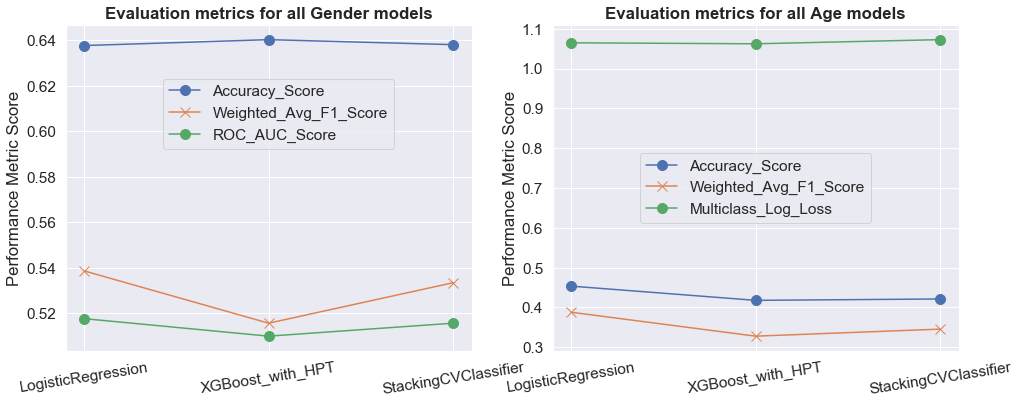

In [25]:
# Plotting the performance evaluation metrics together for all models

plt.figure(figsize=(16,6));

plt.subplot(1,2,1)
plt.title(label='Evaluation metrics for all Gender models', fontdict=dict(fontweight='bold'));
plt.plot('ModelType', 'Accuracy_Score', data=df_gender_metrics, marker='o', markersize=10);
plt.plot('ModelType', 'Weighted_Avg_F1_Score', data=df_gender_metrics, marker='x', markersize=10);
plt.plot('ModelType', 'ROC_AUC_Score', data=df_gender_metrics, marker='o', markersize=10);
plt.legend(labels=['Accuracy_Score', 'Weighted_Avg_F1_Score', 'ROC_AUC_Score'], loc=(0.24,0.62));
plt.xticks(rotation=9);
plt.ylabel('Performance Metric Score');

plt.subplot(1,2,2)
plt.title(label='Evaluation metrics for all Age models', fontdict=dict(fontweight='bold'));
plt.plot('ModelType', 'Accuracy_Score', data=df_age_metrics, marker='o', markersize=10);
plt.plot('ModelType', 'Weighted_Avg_F1_Score', data=df_age_metrics, marker='x', markersize=10);
plt.plot('ModelType', 'Multiclass_Log_Loss', data=df_age_metrics, marker='o', markersize=10);
plt.legend(labels=['Accuracy_Score', 'Weighted_Avg_F1_Score', 'Multiclass_Log_Loss'], loc='center');
plt.xticks(rotation=9);
plt.ylabel('Performance Metric Score');

plt.show();

___The final models to be selected for deployment are expected to display a balanced 'Female' / 'Male' Gender prediction, as well as a balanced [0-24] / [25-32] / [32+] Age group prediction, without any specific class bias.<br><br>Accordingly, we will opt for the "weighted avg f1-score" as the evaluation metric, since that corresponds to the harmonic balance between Precision and Recall of all the class labels.<br><br>As per this metric, the winning model for the Scenario2 dataset is LogisticRegression for both Gender and Age predictions !!!___

In [26]:
# We will define a function to calculate the KS statistic for classification model

def generate_KS(data=None, target=None, prob=None, deciles=10):
    data = data.copy()
    data[target] = data[target].astype(int)
    data['NegClass'] = 1 - data[target]
    data['DecileNum'] = pd.qcut(data[prob], deciles)
    grouped = data.groupby('DecileNum', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['NegClass']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['NegClass'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['NegClass'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100
    kstable['cum_eventrate'] = kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate'] = kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,deciles+1)
    kstable.index.rename('Decile', inplace=True)
    print('KS is', str(max(kstable['KS'])), '% at decile', str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [27]:
# We will calculate and display the KS statistic table for the Gender LogisticRegression model

df_temp = pd.DataFrame(data={'GenderClass':Ypreds_gender_LR, 'PositiveClassProbability':Yprobs_gender_LR[:,1]})
df_KStable = generate_KS(data=df_temp, target='GenderClass', prob='PositiveClassProbability', deciles=10)
display(df_KStable)

KS is 95.1 % at decile 9


,min_prob,max_prob,events,nonevents,event_rate,nonevent_rate,cum_eventrate,cum_noneventrate,KS
Decile,,,,,,,,,
1,0.7324,0.8503,840,0,8.64%,0.00%,8.64%,0.00%,8.6000
2,0.6964,0.7303,1213,0,12.48%,0.00%,21.13%,0.00%,21.1000
3,0.6754,0.6957,1024,0,10.54%,0.00%,31.66%,0.00%,31.7000
4,0.6619,0.6750,1026,0,10.56%,0.00%,42.22%,0.00%,42.2000
5,0.6395,0.6616,846,0,8.71%,0.00%,50.93%,0.00%,50.9000
6,0.6288,0.6392,1180,0,12.14%,0.00%,63.07%,0.00%,63.1000
7,0.6084,0.6283,1058,0,10.89%,0.00%,73.96%,0.00%,74.0000
8,0.5815,0.6078,1021,0,10.51%,0.00%,84.46%,0.00%,84.5000
9,0.5277,0.5802,1029,0,10.59%,0.00%,95.05%,0.00%,95.1000


___With this we have reached the end of the ModelBuilding_Scenario2 stage. DeploymentTesting will be taken up in the next and final stage.___